## Imports

In [0]:
#imports
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Carregando o Dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, id_treino), (imagens_teste, id_teste)) = dataset.load_data()

## Entendendo o Dataset

In [0]:
#
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(id_teste)
id_treino.min()
id_treino.max()

9

## Exibindo os dados

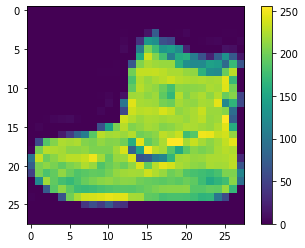

In [0]:

total_classificacoes = 10
nomes_classificacoes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
'Coat', 'Sandal','Shirt', 'Sneaker','Bag' ,'Ankle boot' ]
'''
plt.imshow(imagens_treino[0])
plt.title(id_treino[0])


for imagem in range (10):
  plt.subplot(2, 5 , imagem +1) #2 linha e 5 colunas
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[id_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

## Modelo

In [0]:
#normalização
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([
     #entrada
     keras.layers.Flatten(input_shape=(28, 28)),
     
     #processamento
     keras.layers.Dense(258, activation=tensorflow.nn.relu), #relu: aprendizagem nao linear
    

     #saida
     keras.layers.Dense(10, activation=tensorflow.nn.softmax) 
     ])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, id_treino, epochs=1000, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1000
48000/48000 [==============================] - 5s 97us/sample - loss: 1.0514 - acc: 0.6635 - val_loss: 0.6744 - val_acc: 0.7570
Epoch 2/1000
48000/48000 [==============================] - 5s 100us/sample - loss: 0.6216 - acc: 0.7762 - val_loss: 0.5760 - val_acc: 0.7928
Epoch 3/1000
48000/48000 [==============================] - 5s 98us/sample - loss: 0.5475 - acc: 0.8056 - val_loss: 0.5241 - val_acc: 0.8149
Epoch 4/1000
48000/48000 [==============================] - 5s 98us/sample - loss: 0.5066 - acc: 0.8198 - val_loss: 0.4952 - val_acc: 0.8241
Epoch 5/1000
48000/48000 [==============================] - 5s 99us/sample - loss: 0.4798 - acc: 0.8311 - val_loss: 0.4744 - val_acc: 0.8343
Epoch 6/1000
48000/48000 [==============================] - 5s 101us/sample - loss: 0.4613 - acc: 0.8386 - val_loss: 0.4590 - val_acc: 0.8367
Epoch 7/1000
48000/48000 [==============================] - 5s 103us/sample - loss: 0.4466 - acc: 0.84

## Plotagem de acuracia e perda

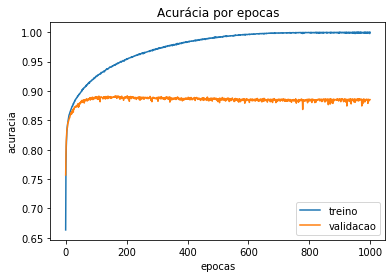

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por epocas')
plt.xlabel('epocas')
plt.ylabel('acuracia')
plt.legend(['treino', 'validacao'])

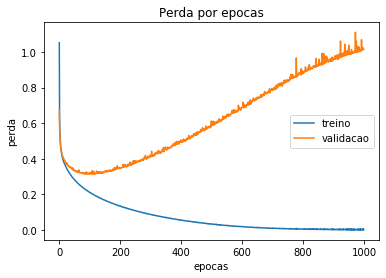

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por epocas')
plt.xlabel('epocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])

## Testes

In [0]:
testes = modelo.predict(imagens_teste)
print('Resultado do teste: ', np.argmax(testes[0]))
print('Numero da imagem de teste: ' id_teste[0])

SyntaxError: ignored

In [0]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, id_teste)
print('A perda do teste é de: ', perda_teste)
print('A acuracia teste é de: ', acuracia_teste)